In [1]:
from PyDSTool import *
from PyDSTool.Toolbox import phaseplane as pp
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [2]:
dir = './figures/'
plt.rc('text', usetex=True)

# Carryover of a transcritical bifurcation after transforming one parameters into a variable

## One-dimensional case, normal form
$$f(x,a;b)=ax+b-x^2$$
if $b=0$ fixed, there is a transcritical bifurcation.

In [3]:
xstr = 'a*x+b-x**2'
params = {'a': 1, 'b': 0}
ics = {'x': 1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'a': [-2, 2], 'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4]}
DSargs.varspecs = {'x': xstr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [4]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'x': array([0.])}, {'x': array([1.])})

In [5]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.initpoint = fps[0]
PCargs.type = 'EP-C'
PCargs.freepars = ['a']
PCargs.StepSize = 1e-4
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

BP Point found 
0 : 
x  =  2.16753180861308e-27
a  =  -3.084155838601035e-24

Eigenvalues = 

     (0.000000,0.000000)
     (-0.000000,0.000000)


branch angle = -1.0
Test function #1: 0.0

B Point found 
0 : 
x  =  0.0
a  =  -2.0

B Point found 
0 : 
x  =  0.0
a  =  2.000000011656571



/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/BifPoint.py:201: LinAlgWarning: Ill-conditioned matrix (rcond=2.16753e-27): result may not be accurate.
  v0 = linalg.solve(r_[c_[J_coords, J_params],


In [6]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.initpoint = fps[1]
PCargs.type = 'EP-C'
PCargs.freepars = ['a']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

BP Point found 
0 : 
x  =  2.520255344354985e-22
a  =  4.772791744752622e-22

Eigenvalues = 

     (0.000000,0.000000)
     (-0.000000,0.000000)


branch angle = -0.7071067811845627
Test function #1: 1.78208964432005e-22

B Point found 
0 : 
x  =  -2.0000000130071043
a  =  -2.0000000130071043

B Point found 
0 : 
x  =  2.0000000059100325
a  =  2.0000000059100325



/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/BifPoint.py:201: LinAlgWarning: Ill-conditioned matrix (rcond=2.52026e-22): result may not be accurate.
  v0 = linalg.solve(r_[c_[J_coords, J_params],


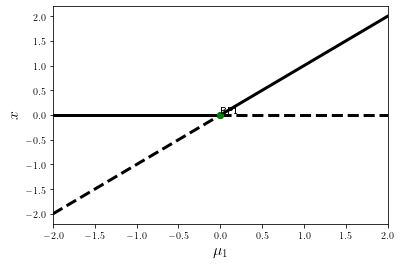

In [7]:
PC['EQ1'].display(('a', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('a', 'x'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu_1$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Bif.pdf', bbox_inches='tight')
plt.show()

In [8]:
namefold1 = 'F01'
PCargs = args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:BP1'
PCargs.freepars = ['a', 'b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[namefold1].backward()
PC.curves[namefold1].forward()

/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/TestFunc.py:366: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  MLU = linalg.lu_factor(c_[r_[A,transpose(self.data.C)], r_[self.data.B,self.data.D]])


B Point found 
0 : 
x  =  -1.0000000031388285
a  =  -2.0000000061686722
b  =  -1.0000000061686722

B Point found 
0 : 
x  =  1.0000000031242402
a  =  2.0000000061682726
b  =  -1.0000000061682726



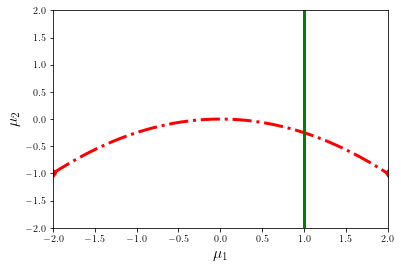

In [9]:
PC[namefold1].display(('a', 'b'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P', 'BT'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu_1$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC.plot.fig1.axes1.axes.set_ylabel('$\mu_2$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
aa = np.arange(-2, 2, 0.01)
bb = 0*aa + 1
plt.plot(bb, aa, lw=3, ls='-', color='g')
plt.savefig(dir + 'v2Ex1Case1Bif1.pdf', bbox_inches='tight')
plt.show()

**Second case**
$$x'=f(x,a;b)=-ax-b-x^2\\
a'=g(a;b)=1-a$$

In [10]:
xstr = 'a*x+b-x**2'
astr = '1-a'
params = {'b': 0}
ics = {'x': 1, 'a': 1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-2, 2]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [11]:
fps = pp.find_fixedpoints(DS, n=6, eps=1e-8)
fps

({'a': 1.0, 'x': -4.6331407084433053e-23}, {'a': 1.0, 'x': 1.0})

In [12]:
PC2 = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.initpoint = fps[0]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-5
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC2.newCurve(PCargs)
PC2.curves[name1].backward()
PC2.curves[name1].forward()

B Point found 
0 : 
a  =  1.0
x  =  -1.0000000050134916
b  =  2.000000015040475

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.0
x  =  0.5000000395948734
b  =  -0.24999999999999845

Eigenvalues = 

     (-0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.000000000001

B Point found 
0 : 
a  =  1.0
x  =  2.0000000077343945
b  =  2.000000023203183



In [13]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.initpoint = fps[1]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC2.newCurve(PCargs)
PC2.curves[name2].backward()
PC2.curves[name2].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.0
x  =  0.4999999828747646
b  =  -0.2499999999999997

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 0.9999999999663056

Neutral saddle found!

B Point found 
0 : 
a  =  1.0
x  =  -1.000000007734393
b  =  2.000000023203179

B Point found 
0 : 
a  =  1.0
x  =  2.0000000070590027
b  =  2.000000021177008



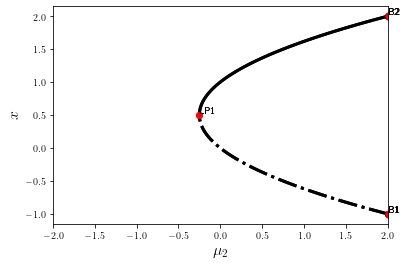

In [14]:
PC2['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC2['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
# PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC2.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC2.plot.fig1.axes1.axes.set_xlabel('$\mu_2$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Case1Bif2.pdf', bbox_inches='tight')
plt.show()

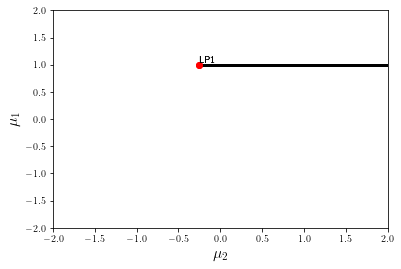

In [15]:
PC2['EQ1'].display(('b', 'a'), stability=True, linewidth=3)
PC2['EQ2'].display(('b', 'a'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC2.plot.fig1.toggleAll('off', bytype=['P','B'])
PC2.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC2.plot.fig1.axes1.axes.set_xlabel('$\mu_2$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC2.plot.fig1.axes1.axes.set_ylabel('$\mu_1$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Case1Bif3.pdf', bbox_inches='tight')
plt.show()

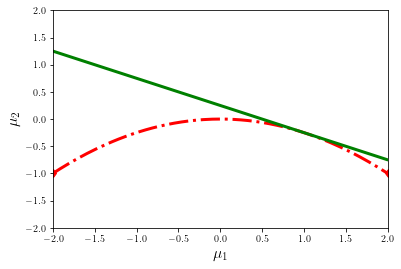

In [16]:
PC[namefold1].display(('a', 'b'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P', 'BT'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu_1$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC.plot.fig1.axes1.axes.set_ylabel('$\mu_2$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
aa = np.arange(-2, 2, 0.01)
# bb = aa**2
bb = -0.5*aa + 0.25
plt.plot(aa, bb, lw=3, ls='-', color='g')
plt.savefig(dir + 'v2Ex1Case2Bif1.pdf', bbox_inches='tight')
plt.show()

**Second case**
$$x'=f(x,a;b)=-ax-b-x^2\\
a'=g(a;b)=1-a$$

In [17]:
xstr = 'a*x+b-x**2'
astr = '-b-0.5*a+0.25'
# astr = 'b-a**2'
params = {'b': 1}
ics = {'x': 1, 'a': 1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [18]:
fps = pp.find_fixedpoints(DS, n=6, eps=1e-8)
fps

({'a': -1.5, 'x': -2.0}, {'a': -1.5, 'x': 0.5})

In [19]:
PC2 = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.initpoint = fps[0]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-5
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC2.newCurve(PCargs)
PC2.curves[name1].backward()
PC2.curves[name1].forward()

B Point found 
0 : 
a  =  -3.500000005166328
x  =  -4.000000005166328
b  =  2.000000002583164

Neutral saddle found!

BP Point found 
0 : 
a  =  1.0000000000560159
x  =  0.5000000000265032
b  =  -0.250000000026053

Eigenvalues = 

     (0.000000,0.000000)
     (-0.473607,0.945373)
     (-0.473607,-0.945373)


branch angle = 1.0
Test function #1: 3.4694469494424005e-11

B Point found 
0 : 
a  =  3.9999999999998224
x  =  3.4999999999998224
b  =  -1.7499999999999112



In [20]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.initpoint = fps[1]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC2.newCurve(PCargs)
PC2.curves[name2].backward()
PC2.curves[name2].forward()

B Point found 
0 : 
a  =  -3.5000000108107328
x  =  0.5
b  =  2.0000000054053664

BP Point found 
0 : 
a  =  1.0000000000191627
x  =  0.5000000000031216
b  =  -0.25000000000935074

Eigenvalues = 

     (-0.000000,0.000000)
     (-0.473607,0.945373)
     (-0.473607,-0.945373)


branch angle = 0.7453559924904288
Test function #1: -1.5515838457724844e-11

Neutral saddle found!

B Point found 
0 : 
a  =  4.000000004648069
x  =  0.5
b  =  -1.7500000023240343



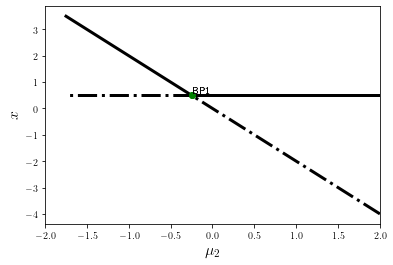

In [21]:
PC2['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC2['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC2.plot.fig1.toggleAll('off', bytype=['P','B'])
PC2.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC2.plot.fig1.axes1.axes.set_xlabel('$\mu_2$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Case2Bif2.pdf', bbox_inches='tight')
plt.show()

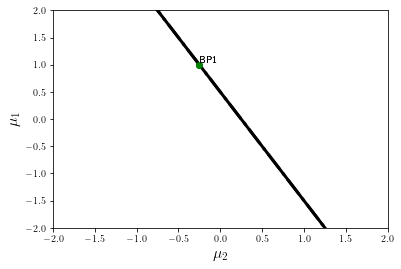

In [22]:
PC2['EQ1'].display(('b', 'a'), stability=True, linewidth=3)
PC2['EQ2'].display(('b', 'a'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC2.plot.fig1.toggleAll('off', bytype=['P','B'])
PC2.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC2.plot.fig1.axes1.axes.set_xlabel('$\mu_2$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC2.plot.fig1.axes1.axes.set_ylabel('$\mu_1$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Case2Bif3.pdf', bbox_inches='tight')
plt.show()

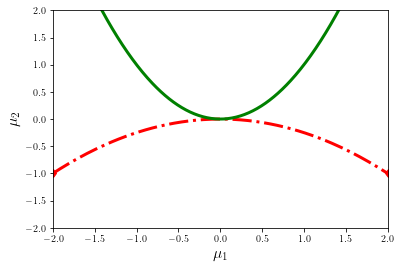

In [23]:
PC[namefold1].display(('a', 'b'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P', 'BT'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu_1$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC.plot.fig1.axes1.axes.set_ylabel('$\mu_2$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
aa = np.arange(-2, 2, 0.01)
bb = aa**2
# bb = -0.5*aa + 0.25
plt.plot(aa, bb, lw=3, ls='-', color='g')
plt.savefig(dir + 'v2Ex1Case2Bif1.pdf', bbox_inches='tight')
plt.show()

**Third case**
$$x'=f(x,a;b)=-ax-b-x^2\\
a'=g(a;b)=b-a^2$$

In [82]:
xstr = 'a*x+b-x**2'
# astr = '-b-0.5*a+0.25'
astr = 'b-a**2'
params = {'b': 1}
ics = {'x': 1, 'a': -1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [83]:
fps = pp.find_fixedpoints(DS, n=6, eps=1e-8)
fps

({'a': -1.0, 'x': -1.618033988749895},
 {'a': 1.0, 'x': -0.6180339887498948},
 {'a': -1.0, 'x': 0.6180339887498959},
 {'a': 1.0, 'x': 1.618033988749895})

In [84]:
PC2 = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.initpoint = fps[0]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-5
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC2.newCurve(PCargs)
PC2.curves[name1].backward()
PC2.curves[name1].forward()

B Point found 
0 : 
a  =  -1.414213567922332
x  =  -2.288245620249591
b  =  2.000000015695612

BP Point found 
0 : 
a  =  -3.7558452775864824e-13
x  =  -7.419446459717066e-13
b  =  1.9898842293860295e-15

Eigenvalues = 

     (-1.182789,0.000000)
     (0.000000,0.000000)
     (1.182789,0.000000)


branch angle = 0.0006177386338006019
Test function #1: -1.8524830103910165e-12

B Point found 
0 : 
a  =  1.4142135682254273
x  =  2.2882456207400104
b  =  2.000000016552896



In [85]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.initpoint = fps[1]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC2.newCurve(PCargs)
PC2.curves[name2].backward()
PC2.curves[name2].forward()

BP Point found 
0 : 
a  =  4.5281128672871364e-11
x  =  -1.438601152660264e-10
b  =  6.799340664925825e-13

Eigenvalues = 

     (-1.070268,0.000000)
     (1.070268,0.000000)
     (0.000000,0.000000)


branch angle = -0.5409019735355465
Test function #1: 2.5503424487282903e-10

B Point found 
0 : 
a  =  -1.414213570435403
x  =  0.8740320538804225
b  =  2.0000000228036505

B Point found 
0 : 
a  =  1.4142135663990607
x  =  -0.8740320513858257
b  =  2.0000000113871503



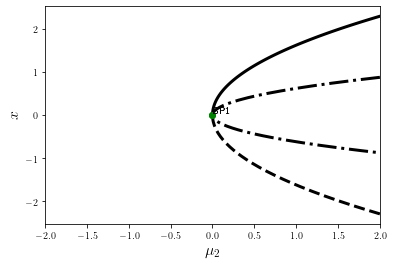

In [86]:
PC2['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC2['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC2.plot.fig1.toggleAll('off', bytype=['P','B'])
PC2.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC2.plot.fig1.axes1.axes.set_xlabel('$\mu_2$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Case2Bif2.pdf', bbox_inches='tight')
plt.show()

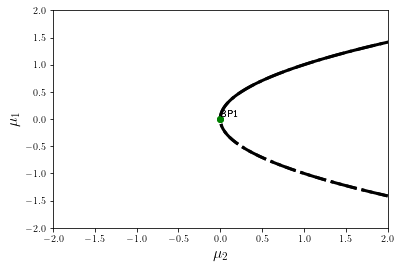

In [87]:
PC2['EQ1'].display(('b', 'a'), stability=True, linewidth=3)
PC2['EQ2'].display(('b', 'a'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC2.plot.fig1.toggleAll('off', bytype=['P','B'])
PC2.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC2.plot.fig1.axes1.axes.set_xlabel('$\mu_2$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC2.plot.fig1.axes1.axes.set_ylabel('$\mu_1$', fontsize=16)
PC2.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Case2Bif3.pdf', bbox_inches='tight')
plt.show()

### Example 2:
$$\dot x = f(x,a;b)=a+b x-x^3$$

In [52]:
xstr = 'a+b*x-x**3'
params = {'a': 0, 'b': 1}
ics = {'x': 1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'a': [-2, 2], 'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4]}
DSargs.varspecs = {'x': xstr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [53]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'x': array([-1.])}, {'x': array([1.])})

In [72]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.initpoint = {'x': 0}
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-4
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

BP Point found 
0 : 
x  =  -5.739718509874451e-42
b  =  1.000000000000003e-12

Eigenvalues = 

     (0.000000,0.000000)
     (1.000000,0.000000)


branch angle = 0.0
Test function #1: -3.0814879110195774e-27

B Point found 
0 : 
x  =  3.5177648533763653e-125
b  =  -1.9999999999999876

B Point found 
0 : 
x  =  0.0
b  =  2.000000011656571



/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/BifPoint.py:201: LinAlgWarning: Ill-conditioned matrix (rcond=5.73972e-42): result may not be accurate.
  v0 = linalg.solve(r_[c_[J_coords, J_params],


In [73]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.initpoint = fps[1]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

BP Point found 
0 : 
x  =  -3.835964567489275e-18
b  =  1.0008205992566992e-12

Eigenvalues = 

     (0.000000,0.000000)
     (0.999989,0.000000)


branch angle = 0.9981355709252319
Test function #1: 2.4977104172466408e-17



/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/BifPoint.py:201: LinAlgWarning: Ill-conditioned matrix (rcond=3.83596e-18): result may not be accurate.
  v0 = linalg.solve(r_[c_[J_coords, J_params],


B Point found 
0 : 
x  =  -1.4142135689320314
b  =  2.0000000185514737

B Point found 
0 : 
x  =  1.4142135690712048
b  =  2.000000018945115



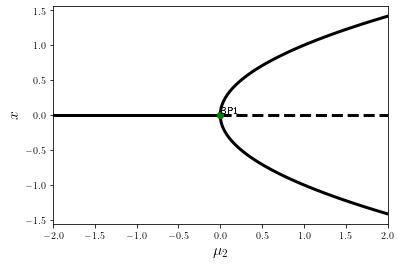

In [74]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu_{2}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex2Bif0.pdf', bbox_inches='tight')
plt.show()

In [75]:
namefold1 = 'F01'
PCargs = args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:BP1'
PCargs.freepars = ['a', 'b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[namefold1].backward()
PC.curves[namefold1].forward()

/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/TestFunc.py:366: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  MLU = linalg.lu_factor(c_[r_[A,transpose(self.data.C)], r_[self.data.B,self.data.D]])


B Point found 
0 : 
x  =  -0.8164965819981993
a  =  1.0886621121744644
b  =  2.000000005230677

B Point found 
0 : 
x  =  0.816496581999392
a  =  -1.0886621121721145
b  =  2.0000000052277986



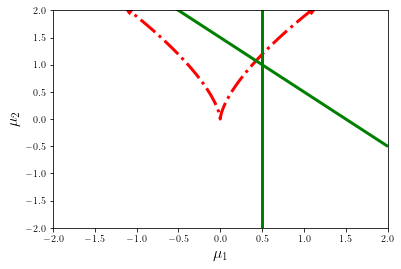

In [94]:
PC[namefold1].display(('a', 'b'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P', 'BT'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu_1$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC.plot.fig1.axes1.axes.set_ylabel('$\mu_2$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
aa = np.arange(-2, 2, 0.01)
bb = -aa+1.5
plt.plot(aa, bb, lw=3, ls='-', color='g')
aa = np.arange(-2, 2, 0.01)
bb = 0*aa+0.
plt.plot(bb, aa, lw=3, ls='-', color='g')
plt.savefig(dir + 'v2Ex2Bif1.pdf', bbox_inches='tight')
plt.show()

**Second case**
$$
\begin{aligned}
\dot x& =f(x,a;b)=ax+b-x^3\\
\dot a& =g(a;b)=2-b^2-a
\end{aligned}
$$

In [137]:
xstr = 'a*x+b-x**3'
astr = 'a*()'
params = {'b': 0}
ics = {'x': 1, 'a': 1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-2, 2]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [138]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'a': 2.0, 'x': -1.4142135623730951}, {'a': 2.0, 'x': 1.4142135623730951})

In [139]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.initpoint = fps[0]
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-4
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
a  =  -2.0000000193257885
x  =  -0.7709169943980548
b  =  -2.0000000048314472


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.5
x  =  -0.7071067715057688
b  =  0.7071067811865474

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 2.1213203143799486

Neutral saddle found!

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.5000000000000002
x  =  0.707106776735891
b  =  -0.7071067811865475

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 2.121320330172871

B Point found 
0 : 
a  =  -2.0000000154674575
x  =  0.7709169949293535
b  =  2.000000003866864



In [140]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.initpoint = {'a': 2.0, 'x': 0}
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.5
x  =  -0.7071067751842477
b  =  0.7071067811865474

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 2.121320325431294

B Point found 
0 : 
a  =  -2.0000000154674593
x  =  -0.7709169949293533
b  =  -2.0000000038668646

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.5
x  =  0.7071067751842477
b  =  -0.7071067811865474

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 2.121320325431294

B Point found 
0 : 
a  =  -2.0000000154674593
x  =  0.7709169949293533
b  =  2.0000000038668646



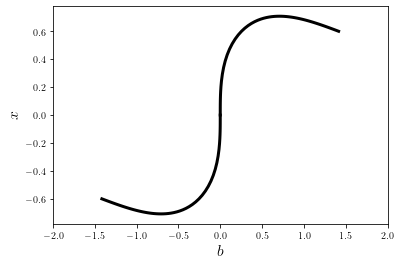

In [29]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
# PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.show()

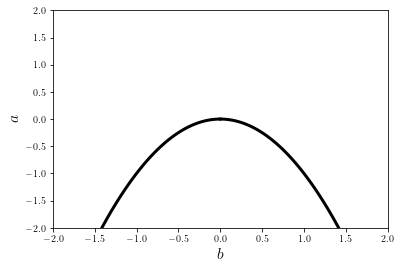

In [31]:
PC['EQ1'].display(('b', 'a'), stability=True, linewidth=3)
# PC['EQ2'].display(('b', 'a'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-2, 2))
PC.plot.fig1.axes1.axes.set_ylabel('$a$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.show()

In [190]:
xstr = 'a**2*x+a-x**2'
params = {'a': 1}
ics = {'x': 1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'a': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4]}
DSargs.varspecs = {'x': xstr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [191]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'x': array([-0.61803399])}, {'x': array([1.61803399])})

In [192]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.initpoint = fps[0]
PCargs.type = 'EP-C'
PCargs.freepars = ['a']
PCargs.StepSize = 1e-4
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
x  =  4.661946773858263e-09
a  =  2.1733747722287467e-17

Eigenvalues = 

     (-0.000000,0.000000)


a = 0.9999999999999999

B Point found 
0 : 
x  =  4.449489734767388
a  =  1.9999999979109864

B Point found 
0 : 
x  =  -0.4494897388374543
a  =  2.0000000242243283



In [193]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.initpoint = fps[1]
PCargs.type = 'EP-C'
PCargs.freepars = ['a']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
x  =  -5.479609384014803e-09
a  =  3.002611900138309e-17

Eigenvalues = 

     (0.000000,0.000000)


a = 1.0000000000000002

B Point found 
0 : 
x  =  -0.4494897423097281
a  =  2.000000002906693

B Point found 
0 : 
x  =  4.449489736607365
a  =  1.9999999983905072



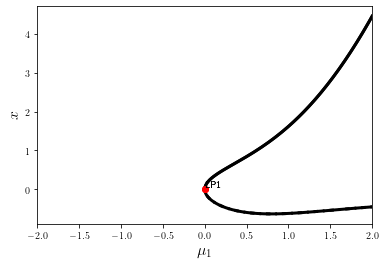

In [194]:
PC['EQ1'].display(('a', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('a', 'x'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 2))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu_1$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'v2Ex1Bif.pdf', bbox_inches='tight')
plt.show()